In [2]:
# ✅ Imports
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from glob import glob


In [3]:
# Config
IMG_SIZE = 224
SEED = 42
DATASET_ROOT = "/kaggle/input/mammography/Dataset of Breast mammography images with Masses"
COMBINED_FOLDER = "INbreast+MIAS+DDSM Dataset"
OUTPUT_DIR = "/kaggle/working/processed_data"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [4]:
# Utility: Get image paths and labels
def get_image_paths_and_labels(dataset_root, combined_folder):
    image_paths = []
    labels = []
    class_map = {"Benign Masses": 0, "Malignant Masses": 1}

    for label_folder, label in class_map.items():
        folder_path = os.path.join(dataset_root, combined_folder, label_folder)
        for ext in ["*.png", "*.jpg", "*.jpeg", "*.tif", "*.bmp"]:
            for path in glob(os.path.join(folder_path, ext)):
                image_paths.append(path)
                labels.append(label)

    return np.array(image_paths), np.array(labels)

In [5]:
#Utility: Process and save split
def process_and_save_split(split_name, image_paths, labels):
    X_data = []
    y_data = []

    for img_path, label in tqdm(zip(image_paths, labels), desc=f"Processing {split_name}", total=len(image_paths)):
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            X_data.append(img)
            y_data.append(label)
        except:
            print(f"Skipped: {img_path}")

    X_data = np.array(X_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    y_data = np.array(y_data)

    save_path = os.path.join(OUTPUT_DIR, f"{split_name}_data.npz")
    np.savez_compressed(save_path, X=X_data, y=y_data)
    print(f"Saved {split_name} split to: {save_path}")


In [6]:
# Load image paths and labels
all_image_paths, all_labels = get_image_paths_and_labels(DATASET_ROOT, COMBINED_FOLDER)

In [7]:
# Train/Val/Test Split 
paths_temp, paths_test, labels_temp, labels_test = train_test_split(
    all_image_paths, all_labels, test_size=0.15, stratify=all_labels, random_state=SEED
)
paths_train, paths_val, labels_train, labels_val = train_test_split(
    paths_temp, labels_temp, test_size=0.15, stratify=labels_temp, random_state=SEED
)

In [8]:
# Process and save each split
process_and_save_split("train", paths_train, labels_train)
process_and_save_split("val", paths_val, labels_val)
process_and_save_split("test", paths_test, labels_test)


Processing train: 100%|██████████| 17755/17755 [01:38<00:00, 180.45it/s]


✅ Saved train split to: /kaggle/working/processed_data/train_data.npz


Processing val: 100%|██████████| 3134/3134 [00:18<00:00, 172.48it/s]


✅ Saved val split to: /kaggle/working/processed_data/val_data.npz


Processing test: 100%|██████████| 3687/3687 [00:21<00:00, 168.18it/s]


✅ Saved test split to: /kaggle/working/processed_data/test_data.npz


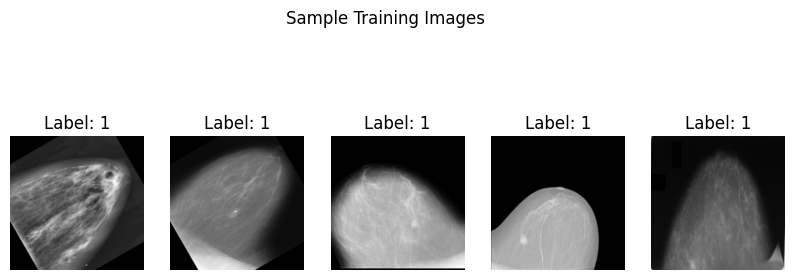

In [16]:
# Visualize few training samples
X_vis = []
y_vis = []
for i in range(5):
    img = cv2.imread(paths_train[i], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    X_vis.append(img)
    y_vis.append(labels_train[i])

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_vis[i], cmap='gray')
    plt.title(f"Label: {y_vis[i]}")
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()
